Most Dominant Colors extraction
==========================

1. Get the Image using cv2
2. Define number of clusters (dominant colors)
3. Convert to RGB vector space
4. Initialize KMeans clusters
5. Cluster centers are dominant colors

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

from sklearn.cluster import KMeans

(350, 350, 3)
(480, 640, 3)


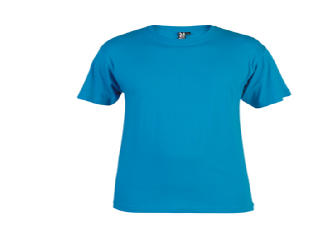

In [9]:
NC = 8
im = cv2.imread('./Blue_Tshirt.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print im.shape

img = cv2.resize(im, (640, 480))
print img.shape

plt.figure(0)
plt.axis("off")
plt.imshow(img)
plt.show()

In [10]:
image_vector = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
print image_vector.shape

(307200, 3)


In [11]:
km = KMeans(n_clusters=NC)
km.fit(image_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[255 115  68]
 [  1   1   1]
 [121  66  46]
 [254 145  97]
 [246 196 155]
 [255 125  75]
 [ 54  30  22]
 [187 101  69]]


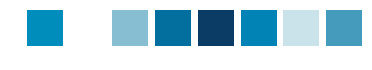

In [16]:
colors = 255 - km.cluster_centers_.astype("uint8")
print colors
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((20, 20, 3))
    cl[:, :, :] = colors[cols]
    plt.subplot(1, NC, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

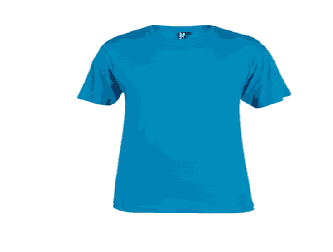

In [13]:
new_im = np.zeros((image_vector.shape))

for ix in range(new_im.shape[0]):
    new_im[ix, :] = colors[km.labels_[ix]]

new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
plt.imshow(new_im)
plt.show()

In [14]:
dom_cols = np.unique(km.labels_, return_counts=True)
lab = dom_cols[0]
hist = dom_cols[1].astype("float")/dom_cols[1].sum()

23.9176432292
[(2, 0.33723958333333331), (7, 0.38639322916666663), (6, 0.44661458333333331), (4, 0.54069010416666674), (3, 2.4690755208333335), (5, 15.687499999999998), (0, 23.917643229166664), (1, 56.21484375)]
<method-wrapper 'next' of listreverseiterator object at 0x7f7e2d472350>


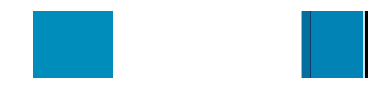

In [28]:
col_sp = np.zeros((100, 500, 3))
x = zip(lab,hist*100)
print x[0][1]
y = sorted(x, key = lambda x:x[1])
print y
#k = reversed(y)
start = 0
for (col, percent) in zip(lab, hist):
    # print percent
    end = int(start + percent*col_sp.shape[1])
    # print end
    col_sp[:, start:end, :] = colors[col]
    start = end

plt.figure(0)
plt.axis("off")
plt.imshow(col_sp)

plt.show()